In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('LabourTrainingEvaluationData.csv')
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [3]:
df.shape

(15992, 9)

In [4]:
df.isnull().sum()

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

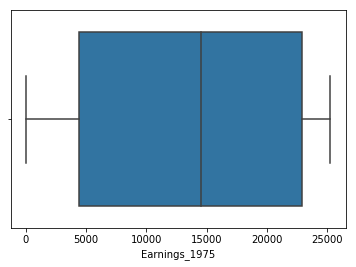

In [5]:
sns.boxplot(df['Earnings_1975'])

In [6]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols = df[num_cols]

In [7]:
cat_cols = df.select_dtypes(include='object').columns


In [8]:
cat_cols_dummy = pd.get_dummies(df[cat_cols])

In [9]:
df = pd.concat([num_cols,cat_cols_dummy],axis=1)

In [10]:
df.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
0,45,1,21516.670,25243.550,25564.670,0,0,1,0,0,1,0,1,0,1,0
1,21,0,3175.971,5852.565,13496.080,0,1,0,0,0,1,0,1,0,0,1
2,38,0,23039.020,25130.760,25564.670,1,0,0,0,0,1,0,1,0,1,0
3,48,1,24994.370,25243.550,25564.670,0,0,1,0,0,1,0,1,0,1,0
4,18,1,1669.295,10727.610,9860.869,0,0,1,0,0,1,0,1,0,1,0


In [11]:
x= df.drop(columns=['Earnings_1978'])
y =df['Earnings_1978']

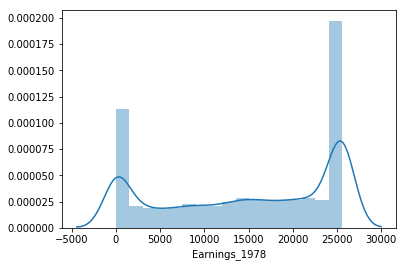

In [12]:
sns.distplot(df['Earnings_1978'])

As we can observe that most of the Earning_1978 the value is 25000.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

In [14]:
reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Age,-105.587680
Nodeg,-188.401510
Earnings_1974,0.276537
Earnings_1975,0.488328
Eduacation_HighSchool,-472.629859
Eduacation_Intermediate,-200.586552
Eduacation_LessThanHighSchool,-188.401510
Eduacation_PostGraduate,340.341159
Eduacation_graduate,521.276762
Race_NotBlack,398.675884


In [16]:
y_pred = reg.predict(x_test)

In [17]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [18]:
df1.head()

,Actual,Predicted
14404,25564.670,17770.494804
11110,6855.174,15347.443297
13723,25564.670,18632.417084
15425,23309.660,19226.273813
4345,2866.790,8607.886886


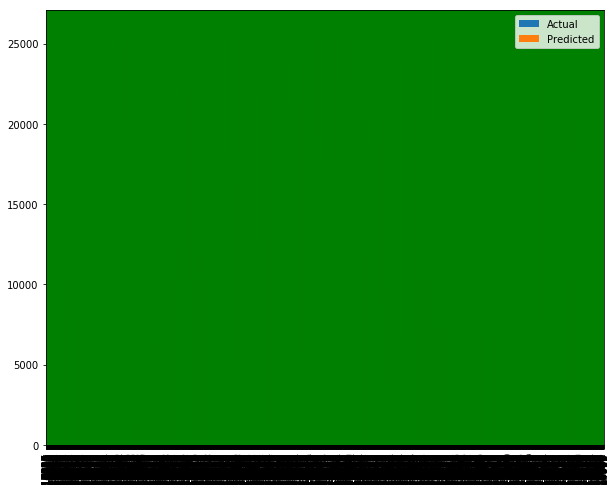

In [19]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
from math import sqrt
mae=metrics.mean_absolute_error(y_test, y_pred)  
mse=metrics.mean_squared_error(y_test, y_pred)  
rmse=sqrt(mse)

In [21]:
print('Mean Absolute Error:', mae) 
print('Mean Squared Error:', mse)  

Mean Absolute Error: 5170.262047811941
Mean Squared Error: 49103834.40884411


In [22]:
print("R sqaured value: ",rmse)

R sqaured value:  7007.412818497574


In [23]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)
r_squared

0.4713556348353404

In [24]:
import statsmodels.formula.api as smapi

In [25]:
df.columns

Index(['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978',
       'Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate', 'Race_NotBlack', 'Race_black',
       'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried'],
      dtype='object')

In [26]:
lm =smapi.ols(formula='''Earnings_1978~Age+Nodeg+Earnings_1974+Earnings_1975+Eduacation_HighSchool+Eduacation_Intermediate+Eduacation_LessThanHighSchool
+Eduacation_PostGraduate+Eduacation_graduate+Race_NotBlack+Race_black+Hisp_NotHispanic+Hisp_hispanic+MaritalStatus_Married+MaritalStatus_NotMarried''',data=df).fit()

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:15:29   Log-Likelihood:            -1.6425e+05
No. Observations:               15992   AIC:                         3.285e+05
Df Residuals:                   15981   BIC:                         3.286e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      2810.0751     87.513     32.110      0.000    2638.540    2981.610
Age                            -106.9786      5.862    -18.249      0.000    -118.469     -95.488
Nodeg                            53.1663     59.422      0.895      0.371     -63.307     169.639
Earnings_1974                     0.2936      0.012     24.210      0.000       0.270       0.317
Earnings_1975                     0.4692      0.012     38.482      0.000       0.445       0.493
Eduacation_HighSchool           153.3547     99.196      1.546      0.122     -41.081     347.790
Eduacation_Intermediate         494.1867    125.513      3.937      0.000     248.167     740.206
Eduacation_LessThanHighSchool    53.1663     59.422      0.895      0.371     -63.307     169.639
Eduacation_PostGraduate        1082.8692    191.339      5.659      0.000     707.824    1457.914
Eduacation_graduate            1026.4981    163.140      6.292      0.000     706.725    1346.271
Race_NotBlack                  1837.0587     97.058     18.928      0.000    1646.815    2027.302
Race_black                      973.0164    131.810      7.382      0.000     714.654    1231.379
Hisp_NotHispanic               1578.9830     98.311     16.061      0.000    1386.282    1771.684
Hisp_hispanic                  1231.0921    133.364      9.231      0.000     969.684    1492.501
MaritalStatus_Married          1434.6465     92.744     15.469      0.000    1252.857    1616.436
MaritalStatus_NotMarried       1375.4286     73.734     18.654      0.000    1230.903    1519.955
==============================================================================
Omnibus:                     1560.465   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.620
Skew:                          -0.684   Prob(JB):                         0.00
Kurtosis:                       4.500   Cond. No.                     1.09e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
lm =smapi.ols(formula='''Earnings_1978~Age+Earnings_1974+Earnings_1975+Eduacation_Intermediate+Eduacation_PostGraduate+
Eduacation_graduate+Race_NotBlack+Race_black+Hisp_NotHispanic+Hisp_hispanic+MaritalStatus_Married+MaritalStatus_NotMarried''',data=df).fit()

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1608.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:15:30   Log-Likelihood:            -1.6425e+05
No. Observations:               15992   AIC:                         3.285e+05
Df Residuals:                   15982   BIC:                         3.286e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2861.8005     92.494     30.940      0.000    2680.501    3043.100
Age                       -107.2034      5.824    -18.406      0.000    -118.620     -95.787
Earnings_1974                0.2938      0.012     24.265      0.000       0.270       0.318
Earnings_1975                0.4694      0.012     38.527      0.000       0.445       0.493
Eduacation_Intermediate    360.0015    150.917      2.385      0.017      64.187     655.816
Eduacation_PostGraduate    948.5648    239.211      3.965      0.000     479.684    1417.446
Eduacation_graduate        891.3593    202.400      4.404      0.000     494.633    1288.086
Race_NotBlack             1865.0660     97.779     19.074      0.000    1673.409    2056.723
Race_black                 996.7345    132.666      7.513      0.000     736.693    1256.776
Hisp_NotHispanic          1609.4963     98.690     16.309      0.000    1416.054    1802.939
Hisp_hispanic             1252.3041    133.349      9.391      0.000     990.925    1513.683
MaritalStatus_Married     1461.6728     94.810     15.417      0.000    1275.835    1647.511
MaritalStatus_NotMarried  1400.1277     73.983     18.925      0.000    1255.113    1545.142
==============================================================================
Omnibus:                     1559.711   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2744.317
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       4.500   Cond. No.                     2.06e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

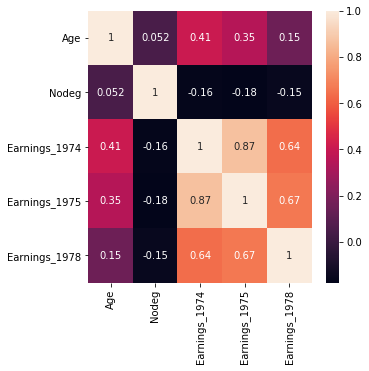

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(num_cols.corr(),annot=True)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


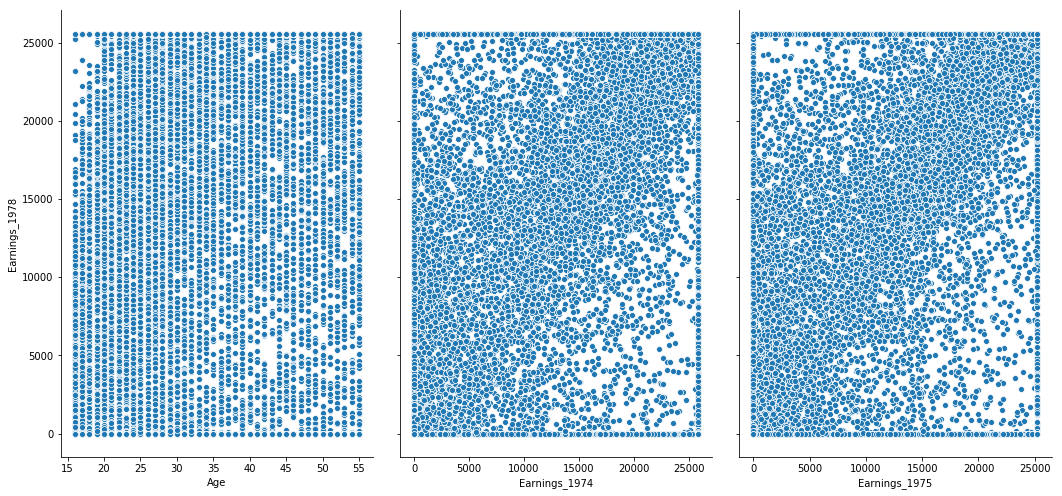

In [31]:
sns.pairplot(df,x_vars=['Age','Earnings_1974','Earnings_1975'],y_vars='Earnings_1978',kind='scatter',size=7,aspect=0.7)

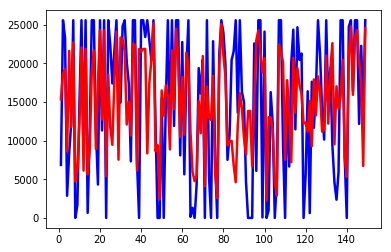

In [32]:
c=[i for i in range(1,150,1)]
fig=plt.figure()
plt.plot(c,y_test[1:150],color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred[1:150],color='red',linewidth=2.5,linestyle='-')

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
vif.round(2)

,VIF Factor,features
0,1.37,Age
1,inf,Nodeg
2,4.41,Earnings_1974
3,4.18,Earnings_1975
4,inf,Eduacation_HighSchool
5,inf,Eduacation_Intermediate
6,inf,Eduacation_LessThanHighSchool
7,inf,Eduacation_PostGraduate
8,inf,Eduacation_graduate
9,inf,Race_NotBlack


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [37]:
regressor = DecisionTreeRegressor()

In [38]:
regressor.fit(x_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
y_pred = regressor.predict(x_test)

In [40]:
y_pred

array([25564.67  , 15007.79  , 25564.67  , ..., 23139.72  , 14373.85  ,
         468.4393])

In [41]:
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
test_score

0.4713418727142509

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
test_score001

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
test_score00001

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)
Ridge_train_score = rr.score(x_train,y_train)
Ridge_train_score

In [ ]:
rr100 = Ridge(alpha=100)
rr100.fit(x_train, y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)
Ridge_test_score100

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score
mae=metrics.mean_absolute_error(y_train, y_pred)  
mse=metrics.mean_squared_error(y_train, y_pred)  
rmse=sqrt(mse)

In [ ]:
print('Mean Absolute Error:', mae) 
print('Mean Squared Error:', mse)  

In [ ]:
print("R sqaured value: ",rmse)

In [ ]:
from sklearn.metrics import r2_score
r_squared=r2_score(y_train,y_pred)
r_squared